## Exploratory Data Analysis - Volleyball_Dataset
So, in this project, we used group by visualizations and plotted histograms, bar charts, pie charts, line charts, box plots, etc.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("VNL2023.csv")

In [156]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [158]:
df.shape

(131, 10)

We have 131 rows and 10 columns in this dataset.

In [161]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [163]:
df.isna()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
126,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False,False


In [165]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [167]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Length: 131, dtype: bool

In [169]:
df.duplicated().sum()

0

### Checking the Correlations.

Let's check if any numeric column is correlated with another, which means they are related somehow. 
Correlation can take values between 1 and -1.
1 = Strong Positive Relationship
-1 = strong Negative Relationship.

In [173]:
numeric_cols = df.select_dtypes(include = ["int", "float"]).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)


              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Here, we can see that the Correlation between Age and Age is 1 or to be precise, we are getting diagonally 1. Serve and Attack have a strong correlation of 0.7. Similarly, Dig and Serve has 0.6.
We can analyze it in a better way using a heatmap.

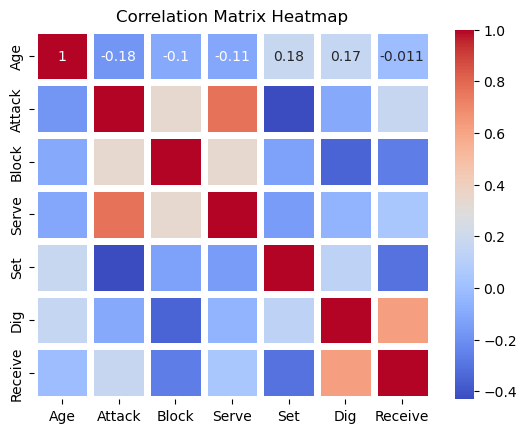

In [176]:
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", linewidths = 5)
plt.title("Correlation Matrix Heatmap")
plt.show()

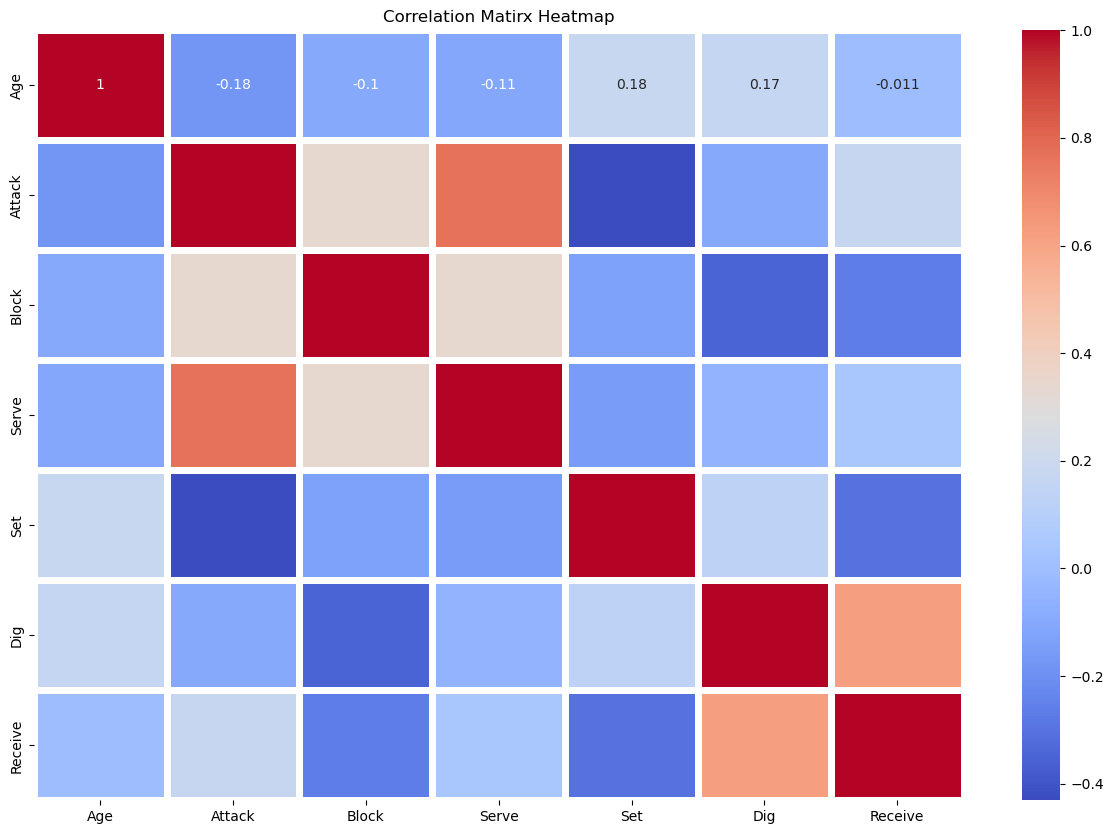

In [178]:
plt.figure(figsize= (15, 10))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", linewidths= 5)
plt.title("Correlation Matirx Heatmap")
plt.show()

In [180]:
# Let's get the value counts for the position column.
position_counts = df["Position"].value_counts()
position_counts


Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

In [182]:
# Here position_counts is a pandas series type.
type(position_counts)

pandas.core.series.Series

In [184]:
# As it is a series, we can use its index for labeling.
position_counts.index

Index(['OH', 'MB', 'OP', 'S', 'L'], dtype='object', name='Position')

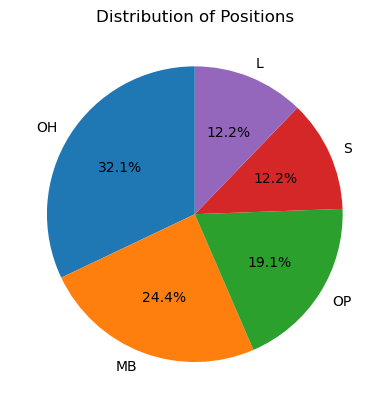

In [186]:
# Now let's create a pie chart of this information.
plt.pie(position_counts, labels = position_counts.index, autopct = "%1.1f%%", startangle = 90)
plt.title("Distribution of Positions")
plt.show()

In [188]:
# Now let's group our data by country and calculate the average attack for each country.
avg_attack_by_country = df.groupby("Country")["Attack"].mean()
avg_attack_by_country

Country
Argentina    5.925000
Brazil       5.250000
Bulgaria     5.282500
Canada       5.405714
China        5.093750
Cuba         6.344286
France       6.670000
Germany      4.833750
Iran         4.707778
Italy        5.965000
Japan        6.595000
Nederland    5.880000
Poland       5.807000
Serbia       5.998750
Slovenia     5.961250
USA          4.600000
Name: Attack, dtype: float64

## Visualization

In [190]:
avg_attack_by_country.sort_values(ascending= False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

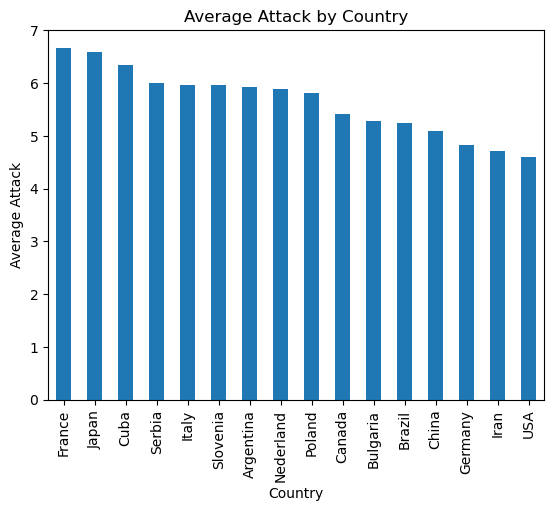

In [192]:
# Now let's create a bar chart with this.
avg_attack_by_country.sort_values(ascending=False).plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.title("Average Attack by Country")
plt.show()

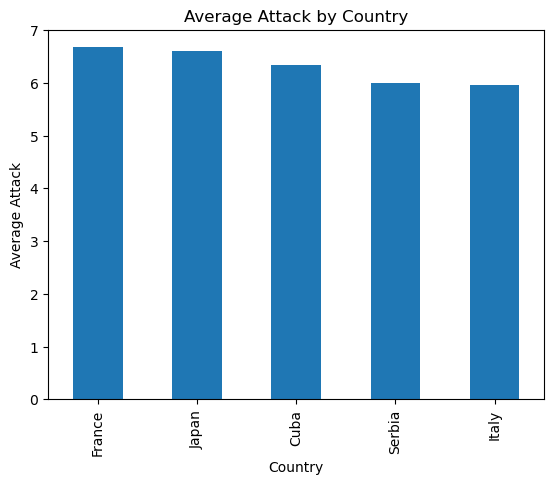

In [194]:
#Let's reduce the number of countries.
avg_attack_by_country.sort_values(ascending= False).head(5).plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.title("Average Attack by Country")
plt.show()

In [196]:
# Now let's group our data by age and calculate the average serve for each age group.
avg_serve_by_age = df.groupby("Age")["Serve"].mean()
avg_serve_by_age.sort_values(ascending = False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [198]:
# Now let's group our data by country and position with multiple group bys or indexes and then calculate the maximum attack for each combination.
# So we are going to group by two things so I am going to give them in a list.
df.groupby(["Country", "Position"])["Attack"].max()

Country    Position
Argentina  L            0.00
           MB           7.92
           OH          11.62
           OP           9.15
           S            0.78
                       ...  
USA        L            0.00
           MB           3.53
           OH           9.53
           OP           9.07
           S            0.40
Name: Attack, Length: 79, dtype: float64

In [200]:
df.groupby(["Country", "Position"])["Attack"].max().reset_index().sort_values(ascending = False, by = "Attack").head(20)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


In [202]:
# Let's group by country and calculate total dig for each country.
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

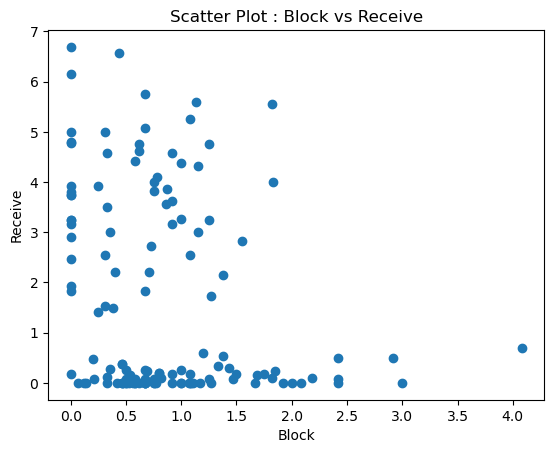

In [205]:
# Now let's create a scatter plot between block and receive.
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter Plot : Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

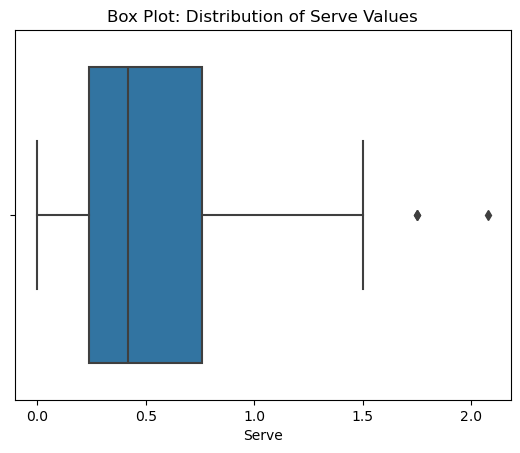

In [207]:
# Let's create a boxplot for the distribution of the serve values.
sns.boxplot(x = df["Serve"])
plt.title("Box Plot: Distribution of Serve Values")
plt.xlabel("Serve")
plt.show()


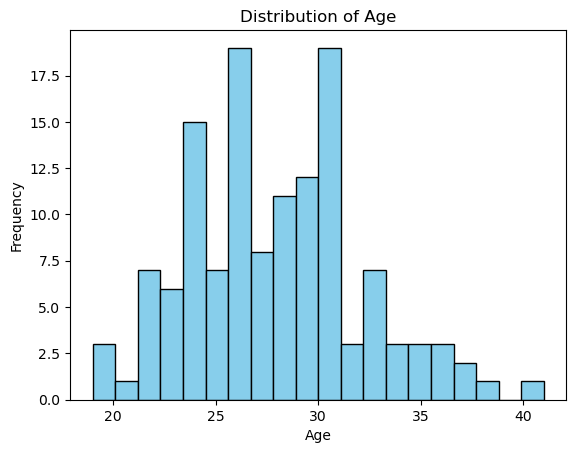

In [209]:
# Let's create a histogram of age with age groups.
plt.hist(df["Age"], bins = 20, color = "skyblue", edgecolor = "Black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

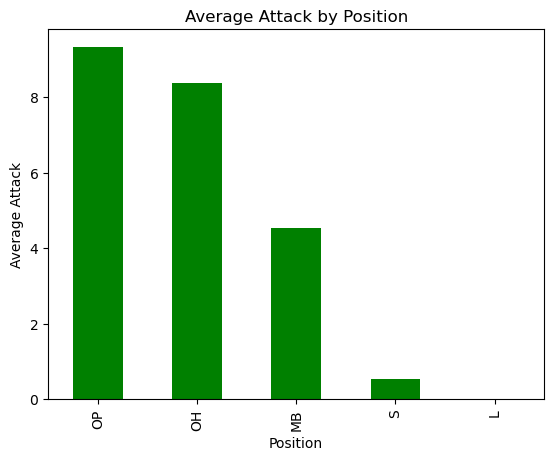

In [211]:
# Let's create some plots with the group by.
# Let's create a bar chart for the average attack by position.
avg_attack_by_position = df.groupby("Position")["Attack"].mean()

avg_attack_by_position.sort_values(ascending = False).plot(kind = "bar", color = "green")
plt.title("Average Attack by Position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

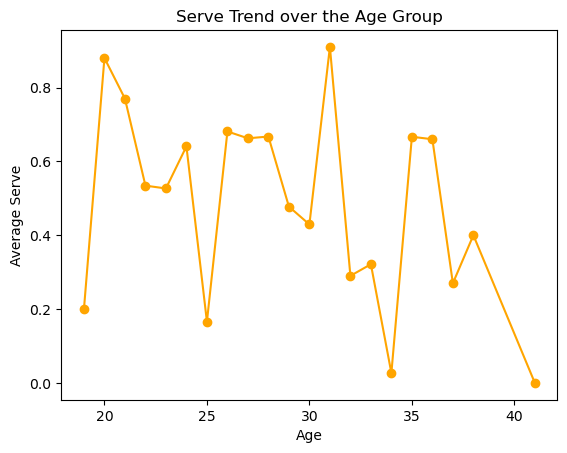

In [213]:
# Let's create the line plot for the trend of serve over the age group.
serve_trend_by_age = df.groupby("Age")["Serve"].mean()

serve_trend_by_age.plot(kind = "line", marker = "o", linestyle = "-", color = "orange")
plt.title("Serve Trend over the Age Group")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

In [215]:
#Let's create a stack bar chart and a scaler bar chart for the total attack and block by country.
total_attack__block_by_country = df.groupby("Country")[["Attack", "Block"]].sum()

In [221]:
total_attack__block_by_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


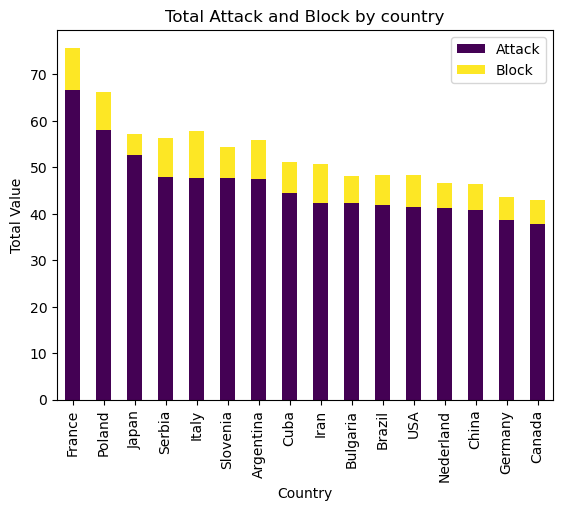

In [227]:
total_attack__block_by_country.sort_values(ascending = False, by = "Attack").plot(kind = "bar", stacked = True, colormap = "viridis")
plt.title("Total Attack and Block by country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()